In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [4]:
X = df_dummy.copy()
del X["charges"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
sex_male            1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(1), int64(2), uint8(5)
memory usage: 38.0 KB


In [5]:
y = df.charges

In [6]:
X_train, X_test, y_train,y_test = model_selection.train_test_split(X,
                            y, test_size = 0.3, random_state = 1)

In [7]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
744,50,26.41,0,1,0,1,0,0
363,21,26.40,1,0,0,0,0,1
10,25,26.22,0,1,0,0,0,0
970,50,28.16,3,0,0,0,1,0
634,51,39.70,1,1,0,0,0,1


For every column (column wise)

Z = (x - mean(x))/sd(x)

Zero mean and 1 standard deviation

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) #learns what is the mean and std for each column
X_train_std = scaler.transform(X_train) #applies mean and std to find Z
X_test_std = scaler.transform(X_test)

In [9]:
type(X_train_std)

numpy.ndarray

In [10]:
pd.DataFrame(X_train_std, columns=X.columns).head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939


In [11]:
pd.DataFrame(X_train_std, columns=X.columns).describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.791065e-16,-4.635418e-16,-2.910332e-16,1.767342e-17,8.979047e-17,-1.088873e-16,4.886879e-17,-2.372271e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [12]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

In [13]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
result["error"] = result.actual - result.predicted
result.sample(10)

,actual,predicted,error
493,12574.04900,17154.057687,-4580.008687
992,10118.42400,11554.090567,-1435.666567
83,11033.66170,15409.360907,-4375.699207
636,2709.11190,1685.348185,1023.763715
958,41034.22140,35175.363343,5858.858057
1331,10795.93733,4649.052090,6146.885240
1117,36124.57370,29525.217685,6599.356015
393,9290.13950,11462.239382,-2172.099882
1323,43896.37630,36356.225051,7540.151249
661,22192.43711,10443.140835,11749.296275


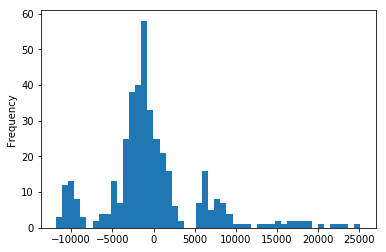

In [14]:
result.error.plot.hist(bins = 50)

In [15]:
mse = metrics.mean_squared_error(result.actual, result.predicted)
mse

36761456.352013245

In [16]:
rmse = np.sqrt(mse)
rmse

6063.122656850449

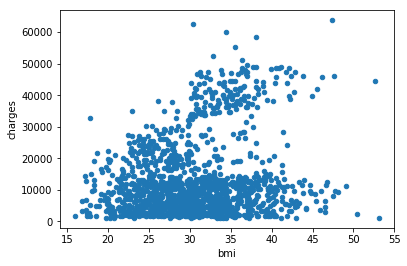

In [17]:
df.plot.scatter("bmi", "charges")

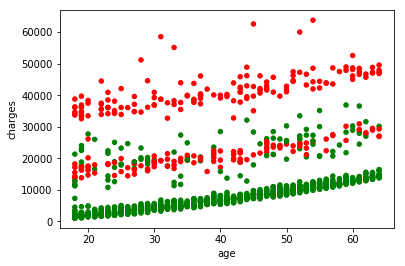

In [20]:
colors = np.where(df.smoker == "yes", "red", "green")
df.plot.scatter("age", "charges", color = colors)

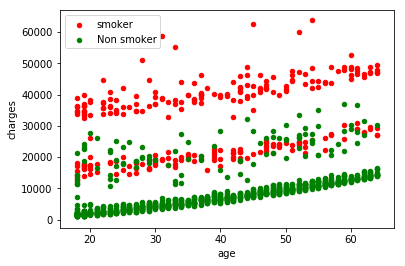

In [33]:
fix, ax = plt.subplots()
df[df.smoker == 'yes'].plot.scatter("age", "charges", 
                        color = "red", label = "smoker", ax = ax)
df[np.not_equal(df.smoker, 'yes')].plot.scatter("age", "charges", 
                        color = "green", label = "Non smoker", ax = ax)
plt.legend()

In [36]:
pd.DataFrame({"coef": lr.coef_, "feature": X.columns})

,coef,feature
0,251.681865,age
1,322.389107,bmi
2,344.964255,children
3,-282.796347,sex_male
4,24059.390477,smoker_yes
5,-304.090098,region_northwest
6,-939.342097,region_southeast
7,-868.188559,region_southwest


In [37]:
lr.intercept_

-11039.238418561543

In [38]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927213

In [41]:
target = "charges"
X = df.copy()
del X[target]
X_dummy = pd.get_dummies(X)
y = df[target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test_pred, y_test)
print("rmse", rmse, "r2_score", r2_score)

rmse 6086.084250074906 r2_score 0.676704833645456


In [49]:
target = "charges"
X = df.copy()
del X[target]
X_dummy = pd.get_dummies(X)
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("rmse", rmse, "r2_score", r2_score)

rmse 0.4267912913336798 r2_score 0.7834595561129307


In [50]:
target = "charges"
X = df.copy()
X["high_bmi"] = np.where(X.bmi > 30, True, False)
X["senior"] =  np.where(X.age > 60, True, False)
del X[target]
X_dummy = pd.get_dummies(X)
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("rmse", rmse, "r2_score", r2_score)

rmse 0.420239707294286 r2_score 0.7900566633733724


In [52]:
# R 
SSE = np.sum((y_test_pred - y_test) ** 2)
SST = np.sum((np.mean(y_train) - y_test) ** 2)
R2 = 1- SSE/SST
R2

0.7900871669331546

In [53]:
# Scikit 
SSE = np.sum((y_test_pred - y_test) ** 2)
SST = np.sum((np.mean(y_test) - y_test) ** 2)
R2 = 1- SSE/SST
R2

0.7900566633733724